<a href="https://colab.research.google.com/github/gauryash/PythonForFinance/blob/master/stock_market_internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:

# converting csv into pandas dataFrame
all_data=pd.read_csv('nifty_data.csv')


In [ ]:
all_data


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,04-Jan-10,5200.90,5238.45,5167.10,5232.20,148652424,6531.61
1,05-Jan-10,5277.15,5288.35,5242.40,5277.90,240844424,7969.62
2,06-Jan-10,5278.15,5310.85,5260.05,5281.80,216147837,7892.60
3,07-Jan-10,5281.80,5302.55,5244.75,5263.10,181246734,6890.99
4,08-Jan-10,5264.25,5276.75,5234.70,5244.75,201910800,7777.04
...,...,...,...,...,...,...,...
2708,02-Dec-20,13121.40,13128.50,12983.55,13113.75,717711761,34008.74
2709,03-Dec-20,13215.30,13216.60,13107.90,13133.90,713688035,39627.71
2710,04-Dec-20,13177.40,13280.05,13152.85,13258.55,640514315,36428.05
2711,07-Dec-20,13264.85,13366.65,13241.95,13355.75,591722966,33578.64


In [ ]:
fig = px.scatter(all_data, x="Date", y="Close", title='nifty_50 data range'  )
fig.show()


In [ ]:
# ploting a scatter plot using plotly library
fig = px.line(all_data, x="Date", y="Close", title='nifty_50 data range'  )
fig.update_xaxes(rangeslider_visible=True)



fig.show()

In [ ]:
# ploting a candlestick using plotly library
#fig = px.line(all_data, x="Date", y="Open", title='nifty_50 candlestick'  )
fig = go.Figure(data=[go.Candlestick(x=all_data['Date'],
                open=all_data['Open'],
                high=all_data['High'],
                low=all_data['Low'],
                close=all_data['Close'])])
fig.show()

In [ ]:
# database slicing removed data parameter
"""# database slicing removed data parameter
data1=all_data[['Open' , 'Close' , 'High' ,'Low' , 'Shares Traded' ,'Turnover (Rs. Cr)']  ]
print(data1)"""
data1=all_data[['Close']]
print(data1)

         Close
0      5232.20
1      5277.90
2      5281.80
3      5263.10
4      5244.75
...        ...
2708  13113.75
2709  13133.90
2710  13258.55
2711  13355.75
2712  13392.95

[2713 rows x 1 columns]


In [ ]:
#The dataset was split into training and test data
print(data1.shape ,'dataset shape')
dataset = data1.values
#print(len(dataset)*0.8)
training_data_len = math.ceil( len(dataset) *.8) 
print('these are the input training parametrs=',training_data_len)


(2713, 1) dataset shape
these are the input training parametrs= 2171


In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(data1)
scaled_data

array([[0.07775109],
       [0.08291567],
       [0.08335641],
       ...,
       [0.98481141],
       [0.99579602],
       [1.        ]])

In [ ]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) #here 0 is column number ie first column
    y_train.append(train_data[i,0])
#print(x_train[0:1],y_train[0:1])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)



x_train shape (2111, 60)
y_train shape (2111,)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) #in lstm data should be in 3d ie rows , column and features vector
print(x_train.shape)

(2111, 60, 1)


In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1))) #add  1st layer
model.add(LSTM(units=50, return_sequences=False))                                 #add 2nd layer 
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2111/2111 [==============================] - 50s 24ms/step - loss: 8.7446e-04


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#print(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

397.44898920182897

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



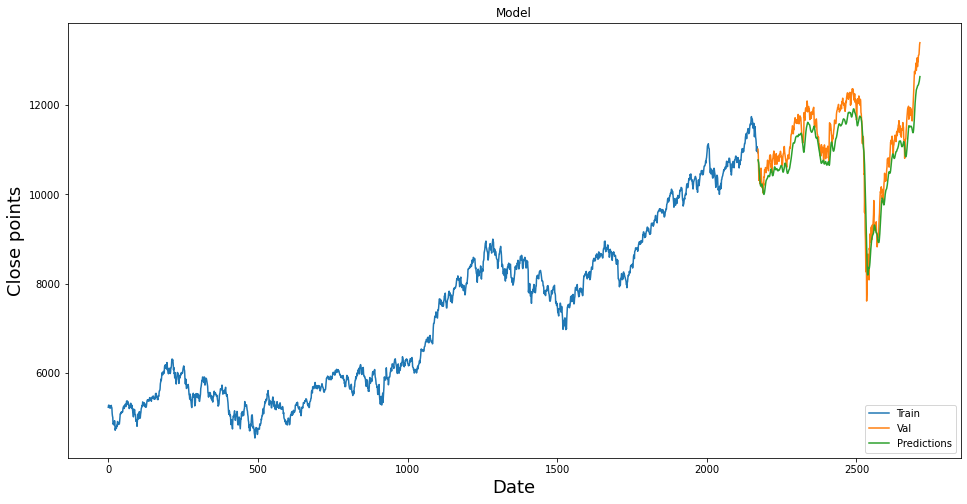

In [ ]:
#Plot/Create the data for the graph
train = data1[:training_data_len]
valid = data1[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close points', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid


,Close,Predictions
2171,11008.30,10767.922852
2172,10858.25,10744.441406
2173,10599.25,10713.228516
2174,10316.45,10650.579102
2175,10348.05,10545.826172
...,...,...
2708,13113.75,12478.000977
2709,13133.90,12506.821289
2710,13258.55,12536.633789
2711,13355.75,12578.894531


In [ ]:
print('error=', 13392.95- 12633.364258)

error= 759.5857420000011
